In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Elmovo rentals

In [2]:
#Load the moped rental data

elmovo_loc = os.path.join(os.getcwd(), 'Elmovo_rentals_12-1-2020.csv')
elmovo = pd.read_csv(elmovo_loc)

#Check for duplicates and null values

print(elmovo.duplicated().value_counts())
print(elmovo.isnull().sum())


print(elmovo.info())

False    4631
dtype: int64
id                                0
state                             0
start_kilometers                  0
start_position                    0
start_time                        0
start_address                     4
end_kilometers                    0
end_position                      0
end_time                          0
end_address                       1
price_for_driving_gross           0
price_for_driving_net             0
price_for_parking_gross           0
price_for_parking_net             0
price_for_reservation_gross       0
price_for_reservation_net         0
rebate_gross                      0
rebate_net                        0
time_driving                      0
time_parking                      0
time_reservation                  0
branch_id                         0
end_branch_id                     0
guser_id                          0
vehicle_id                        0
invoice_id                     3351
rating                         4018
r

There are no duplicates. None of the null values are in columns that will be analysed, so they can be ignored

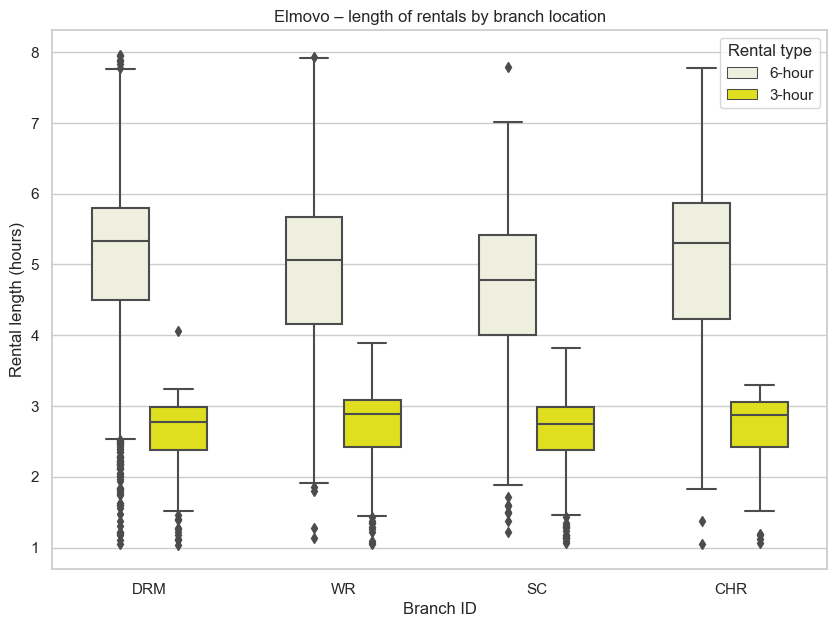

In [3]:
#I want to analyse the effect of the rental locations on rider behaviour. First on rental length

#Rental length combines driving and parking times, which are in seconds so need to be converted into hours
elmovo['rental_length'] = elmovo['time_driving']/3600 + elmovo['time_parking']/3600

#The length of rental was not recorded at booking so we need to segment rentals into 3 and 6-hour
#using the gross price. The lowest cost of a 6-hour rental was £9

conditions = [
    (elmovo['price_for_driving_gross'] < 9),
    (elmovo['price_for_driving_gross'] >= 9)
]
values = ['3-hour', '6-hour']
elmovo['rental_type'] = np.select(conditions, values)
#print(elmovo.rental_type.describe())

#We had some technical issues which meant that some rentals needed to be cancelled soon after start to swap bikes,
#or sometimes the rider was given extra rental time. To analyse behaviour for 'standard' rentals I will 
#limit rentals time to between 1 and 8 hours.

elmovo = elmovo[(elmovo['rental_length'] > 1) & (elmovo['rental_length'] < 8)]

#We are interested in four 'branches' or rental locations
elmovo = elmovo[elmovo.branch_id.isin([4,6,7,8])]


sns.set(rc={"figure.figsize":(10, 7)})
sns.set_style('whitegrid')
ax = sns.boxplot(data = elmovo, y='rental_length', x='branch_id', color='yellow', hue='rental_type', width=.6)
ax.set_xticklabels(['DRM', 'WR', 'SC', 'CHR'])
ax.set(xlabel='Branch ID', ylabel='Rental length (hours)')
plt.legend(loc='upper right', title='Rental type')
plt.title('Elmovo – length of rentals by branch location')
plt.savefig('rental_length.png', dpi=220)

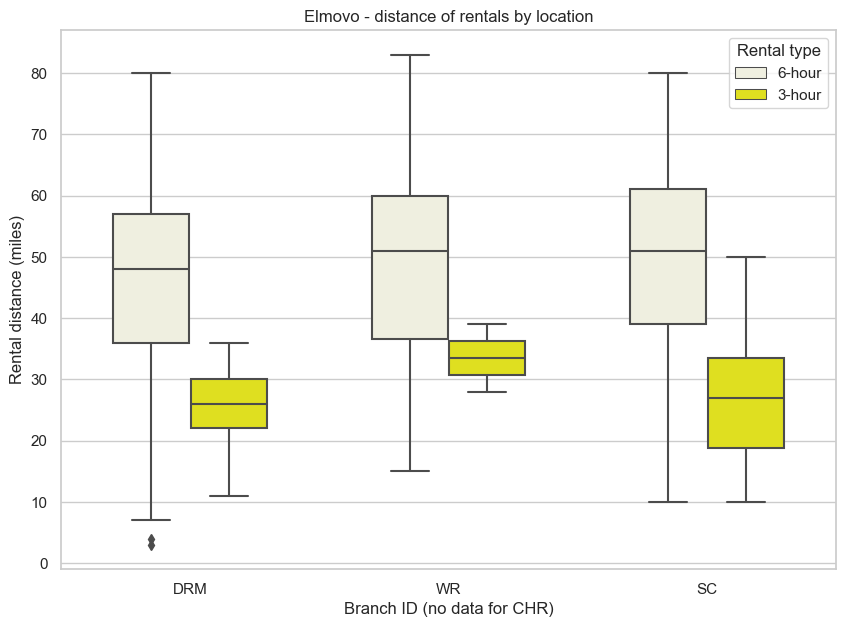

In [4]:
# Next I'll look at the effect of location on the distance ridden during rentala

elmovo['rental_distance'] = elmovo['end_kilometers'] - elmovo['start_kilometers']

#Again because of tech or mechanical problems some rentals had to be ended immediately to swap bikes.
#I'll filter them out
elmovo = elmovo[(elmovo['rental_distance'] > 0)]
elmovo = elmovo[elmovo.branch_id.isin([4,6,7])]

sns.set(rc={"figure.figsize":(10, 7)})
sns.set_style('whitegrid')
ax = sns.boxplot(data = elmovo, y='rental_distance', x='branch_id', color='yellow', hue='rental_type', width=.6)
ax.set_xticklabels(['DRM', 'WR', 'SC'])
ax.set(xlabel='Branch ID (no data for CHR)', ylabel='Rental distance (miles)')
plt.legend(loc='upper right', title='Rental type')
plt.title('Elmovo - distance of rentals by location')
plt.savefig('elmovo_rental_distance.png', dpi=220)

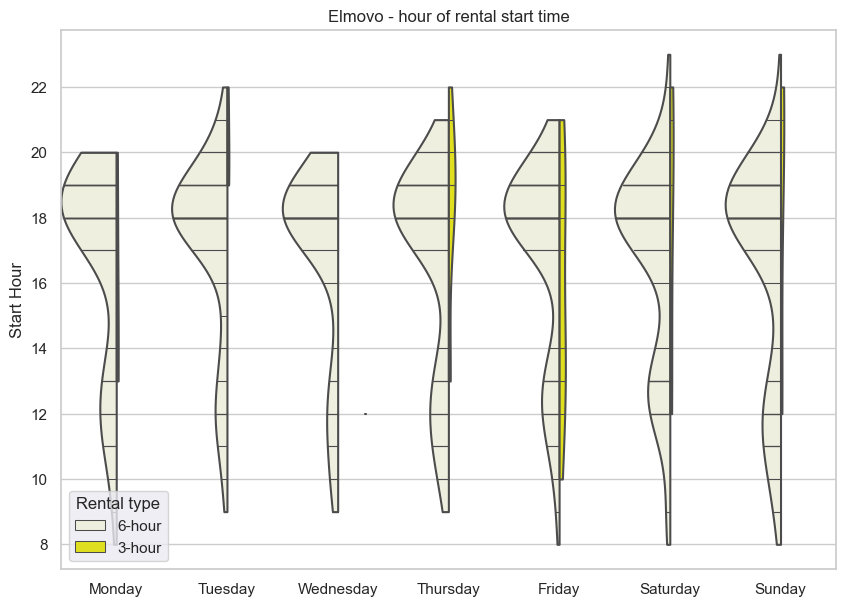

In [5]:
#I am also interested in the distribution of rental times through the week.

#print(elmovo.start_time.describe())
#We need to convert the start time to a datetime object
elmovo['start_time'] = pd.to_datetime(elmovo['start_time'], format='%Y-%m-%d %H:%M:%S')
elmovo['start_day'] = elmovo['start_time'].dt.day_name()
elmovo['start_hour'] = elmovo['start_time'].dt.hour
#print(elmovo.start_hour.describe())

sns.violinplot(data=elmovo, x='start_day', y='start_hour', cut=0, hue='rental_type', color='yellow', scale='count', inner='stick', width= 1, split=True, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.set(rc={"figure.figsize":(10, 7)})
plt.xlabel(None) 
plt.ylabel('Start Hour')
plt.legend(loc='lower left', title='Rental type')
plt.title('Elmovo - hour of rental start time')
plt.savefig('elmovo_rental_start_time.png', dpi=220)